# サポートベクターマシン

> データを学習用とテスト用に分ける

In [1]:
# データセット
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [13]:
# 説明変数
X = dataset.data

In [14]:
# 目的変数
y = dataset.target

In [16]:
# データを学習用とテスト用に分ける
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

In [17]:
# SVM
from sklearn.svm import SVC

svc = SVC(kernel="linear") # 直線
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [28]:
# 性能評価
# 何割正解してるのか
from sklearn.metrics import accuracy_score

# 既知のデータを使った予測
y_train_pred = svc.predict(X_train)

# 既知のデータがどれだけ当たっているか
accuracy_score(y_train, y_train_pred)

0.967032967032967

In [29]:
# 未知のデータを使った予測
y_test_pred = svc.predict(X_test)

# 未知のデータがどれだけ当たっているか
accuracy_score(y_test, y_test_pred)

0.9824561403508771

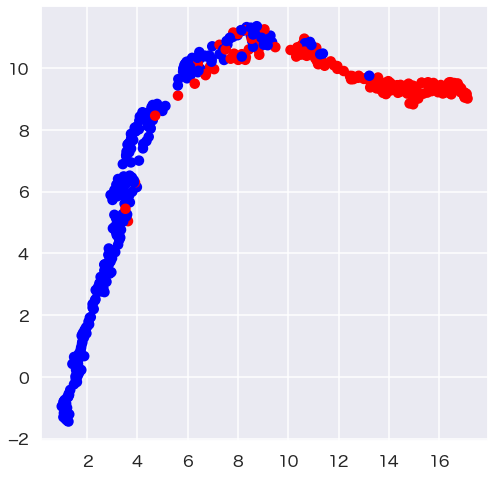

In [30]:
# 次元削減を使ったグラフの表示
# UMAP
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap
from scipy.sparse.csgraph import connected_components

model_umap = umap.UMAP(n_components=2,n_neighbors=100)
vecs_list = model_umap.fit_transform(X_train)

X = vecs_list[:,0]
Y = vecs_list[:,1]

sns.set(font="Hiragino Maru Gothic Pro",context="talk")
plt.figure(figsize=(8, 8))

color_codes = {0:"red",1:"blue",2:"green",3:"yellow"}
colors = [color_codes[x] for x in y_train]
plt.scatter(X,Y,color=colors)